# Name : Adeniyi Adeleke

**MEGR 8090_Introduction to Machine Learning**

**MiniProject 3**

In [18]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [19]:
#Data directory depends on where the file is stored
df = pd.read_excel(r'C:/Users/kyade/Downloads/steel.xlsx')

In [20]:
#Getting dataset from shared google drive and using Google colab
#from google.colab import drive
#drive.mount('/content/gdrive/', force_remount = True)

#df = pd.read_excel(r'/content/gdrive/MyDrive/Adeniyi Adeleke/MiniProject_2/steel.xlsx')

In [21]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


In [22]:
#making a copy of the data
df1 =df.copy()

In [23]:
faults = df.iloc[:, 27:]
df.drop(faults.columns, axis=1, inplace=True) # this will drop the all the defects column
df['Fault Type'] = faults.idxmax(1) #this will add a 'Target' column to our dataset describing which record has a particular defect.
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,Fault Type
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,V28
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,V28
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,V28
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,V28
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,V28


In [24]:
df.shape

(1941, 28)

In [25]:
df['Fault Type'].describe()

count      1941
unique        7
top       Class
freq        673
Name: Fault Type, dtype: object

In [26]:
df['Fault Type'].value_counts() #Number of counts for each fault

Class    673
V33      402
V30      391
V29      190
V28      158
V31       72
V32       55
Name: Fault Type, dtype: int64

Text(0.5, 1.0, 'Number of each Fault')

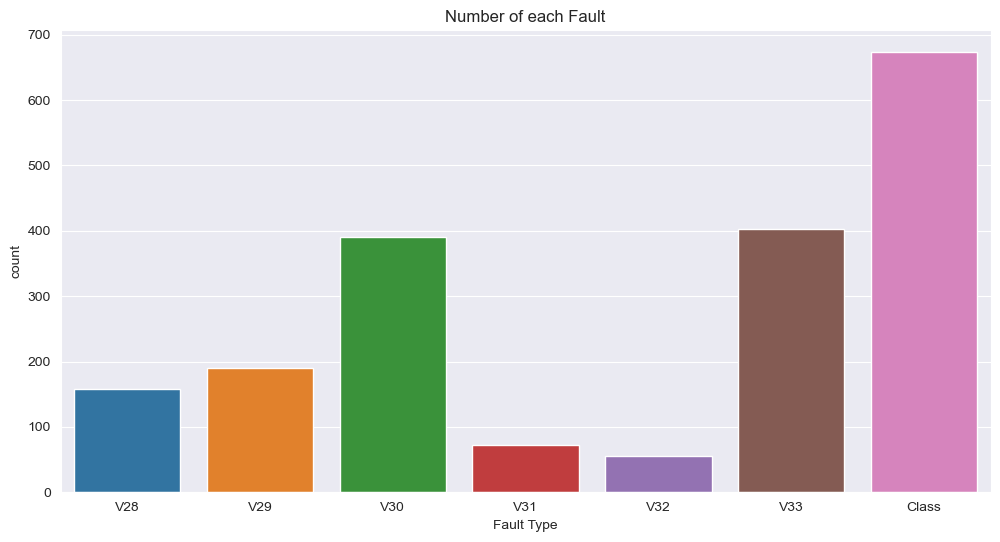

In [27]:
#plot of number of each fault
plt.figure(figsize=(12,6))
sns.countplot(x="Fault Type", data=df)
plt.title('Number of each Fault')

## For Model training and testing

In [28]:
df1.drop(df1.iloc[:, 27:33], axis = 1, inplace=True) #dropping the irrelevant columns

In [29]:
#Importing the test_train_split module
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#Defining the features and target variable
X = df1.iloc[:,0:27]
Y= df1.iloc[:, 27]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30)

In [30]:
#importing required sk learn library
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Finding the error rate and optimal K value

In [31]:
error_rate=[]

for i in range (1,30):
    
    classifier = KNeighborsClassifier(n_neighbors=i, p=2, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    error_rate.append(np.mean(y_pred!= y_test))

Minimum error:- 0.18251928020565553 at K = 4


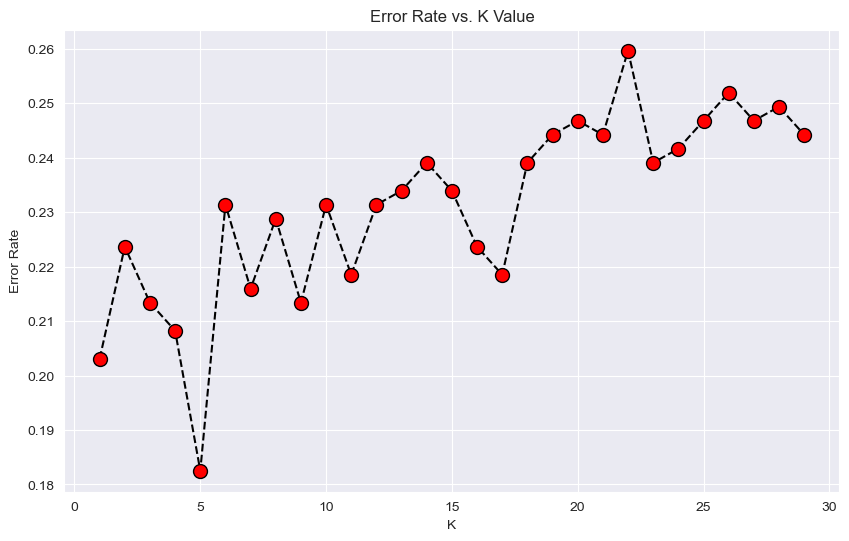

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='black', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:  0.8174807197943444 at K = 4


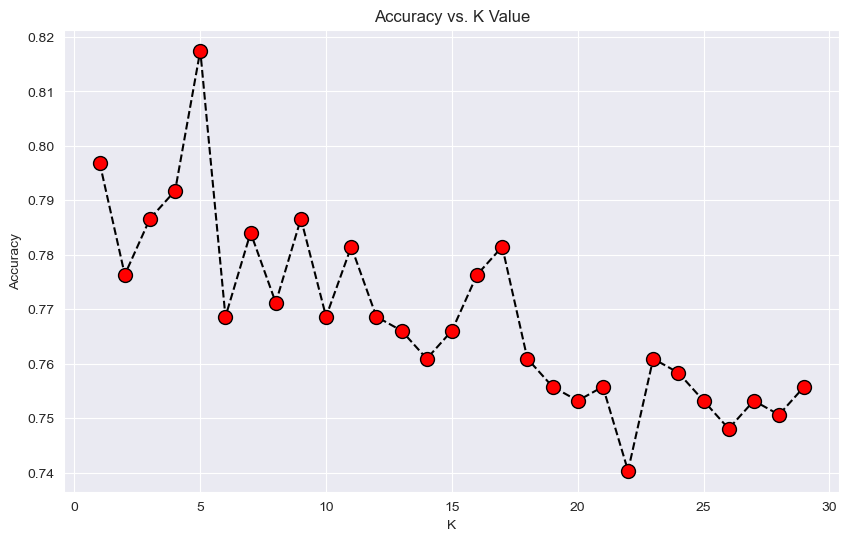

In [33]:
#improving the model
acc =[]
for i in range(1,30):
  classes = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean').fit(x_train,y_train)
  yhat = classes.predict(x_test)
  acc.append(accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc,color = 'black',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc)))

              precision    recall  f1-score   support

           1       0.77      0.96      0.85       247
           2       0.88      0.50      0.64       142

    accuracy                           0.79       389
   macro avg       0.82      0.73      0.75       389
weighted avg       0.81      0.79      0.77       389



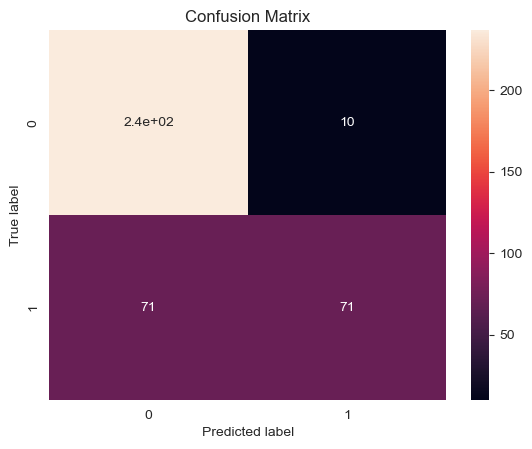

In [36]:
knn1 = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn1.fit(x_train,y_train)
pred1=knn1.predict(x_test)
sns.heatmap(confusion_matrix(y_test, pred1), annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
print(classification_report(y_test,pred1))

## Manhattan Distance

In [37]:
error_rate2=[]

for i in range (1,30):
    
    classifier2 = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    classifier2.fit(x_train,y_train)
    y_pred2=classifier2.predict(x_test)
    error_rate2.append(np.mean(y_pred2!= y_test))

Minimum error: 0.20051413881748073 at K = 2


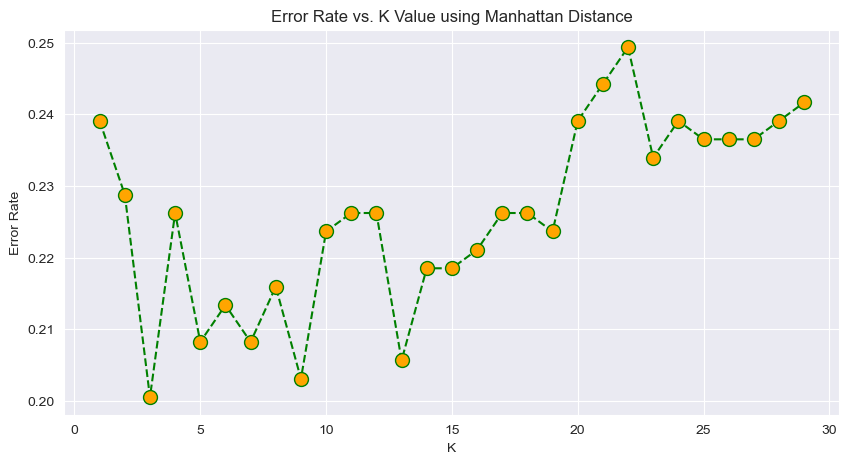

In [40]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30),error_rate2,color='green', linestyle='dashed',marker='o',markerfacecolor='orange',markersize=10)
plt.title('Error Rate vs. K Value using Manhattan Distance')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate2),"at K =",error_rate2.index(min(error_rate2)))

Maximum accuracy: 0.7994858611825193 at K = 2


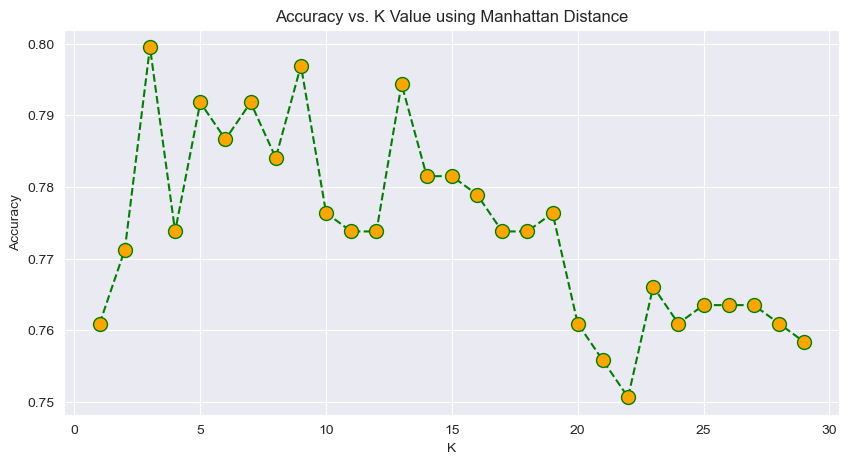

In [41]:
#improving the model
acc2 =[]
for i in range(1,30):
  classes2 = KNeighborsClassifier(n_neighbors=i,metric='manhattan').fit(x_train,y_train)
  yhat2 = classes2.predict(x_test)
  acc2.append(accuracy_score(y_test, yhat2))

plt.figure(figsize=(10,5))
plt.plot(range(1,30),acc2,color = 'green',linestyle='dashed',
         marker='o',markerfacecolor='orange', markersize=10)
plt.title('Accuracy vs. K Value using Manhattan Distance')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc2),"at K =",acc2.index(max(acc2)))

              precision    recall  f1-score   support

           1       0.75      0.96      0.84       247
           2       0.85      0.45      0.59       142

    accuracy                           0.77       389
   macro avg       0.80      0.70      0.72       389
weighted avg       0.79      0.77      0.75       389



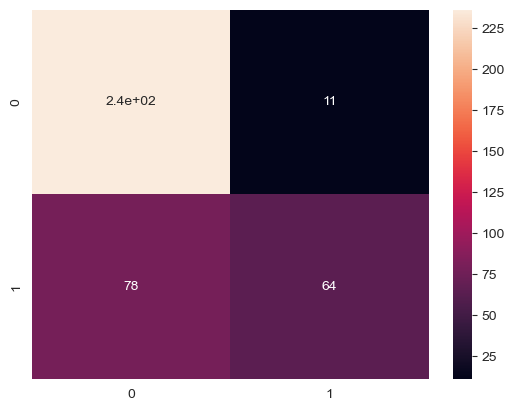

In [52]:
knn2 = KNeighborsClassifier(n_neighbors=2, metric='manhattan') 
knn2.fit(x_train,y_train)
pred2=knn2.predict(x_test)
sns.heatmap(confusion_matrix(y_test, pred2), annot=True)
print(classification_report(y_test,pred2))
#confusion_matrix(y_test, y_pred)



The reason why Manhattan distance is called Manhattan distance in KNN is because it is named after the borough of Manhattan in Newyork, famous for its grid-like street layout where street runs east to west and avenues run north to south with rectangular shaped block in between the street and avenue, which intersects to form right angles. When we calculate distance between two points via anhattn distance,it is measured by adding up the horicontal and vertical distances instead of calculating a straight line difference.

## Feature Importance

<AxesSubplot:>

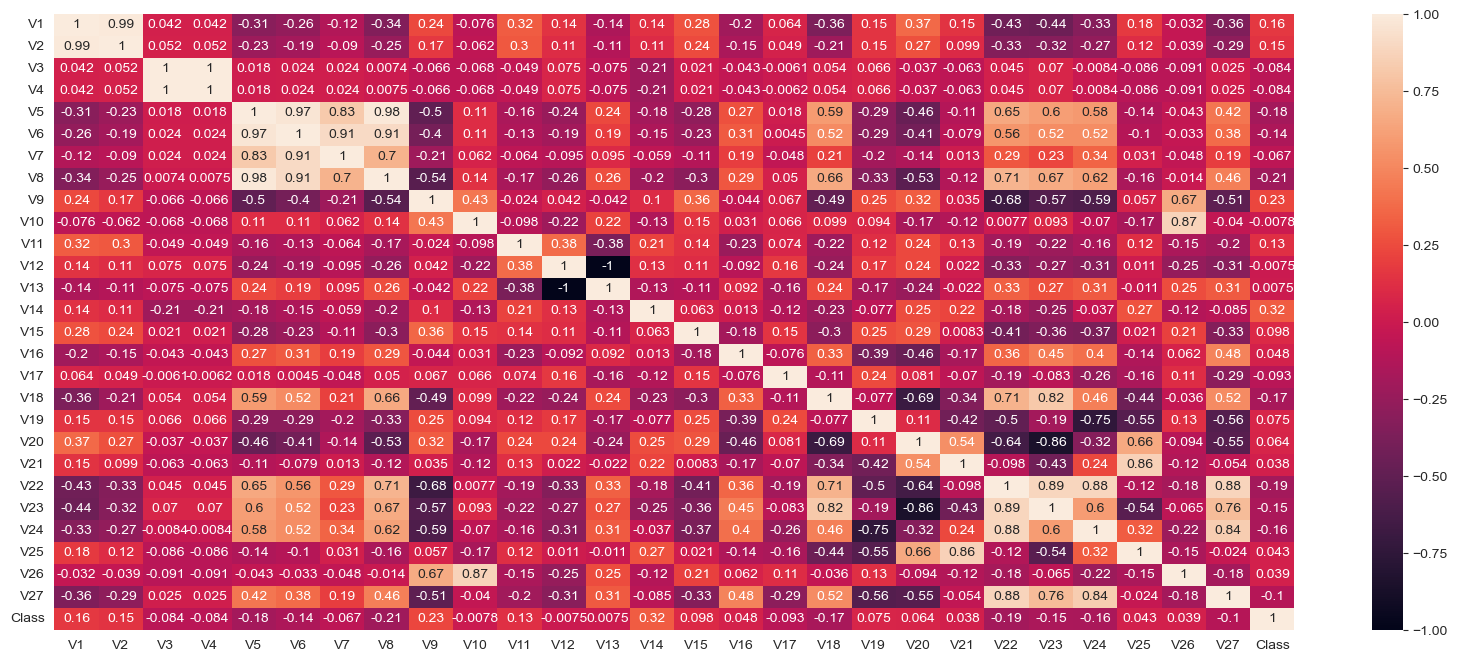

In [46]:
df1_corr = df1.corr()
plt.figure(figsize=(20,8))
sns.heatmap(df1_corr, annot = True)

In [47]:
#Selecting high correlated features
corr_target = abs(df1_corr['Class'])
#Selecting highly correlated features
relevant_features = corr_target[corr_target >.5]
relevant_features

Class    1.0
Name: Class, dtype: float64

The features all have weak positive and negative correlation with the response variable. Most of the correlation are under +/- 0.5. For instance, V2 shows a weak positive correlation coefficient of 0.15 with target variable class. Also, V3 and V4 shows no very little or no correlation with target variable.